# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ames.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

AssertionError: 

Inspect the contents of the dataframe:

In [4]:
# Run this cell without changes
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram with vertical line at mean
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, color='skyblue', bins=30)
plt.axvline(df['SalePrice'].mean(), color='black', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.legend()
plt.show()


(1460, 81)

Now, print out the mean, median, and standard deviation:

In [7]:
mean_price = df['SalePrice'].mean()
median_price = df['SalePrice'].median()
std_price = df['SalePrice'].std()

print(f"Mean: {mean_price:,.2f}")
print(f"Median: {median_price:,.2f}")
print(f"Standard Deviation: {std_price:,.2f}")


Mean: 180,921.20
Median: 163,000.00
Standard Deviation: 79,442.50


In the cell below, interpret the above information.

In [8]:
The histogram of `SalePrice` is slightly right-skewed, with a concentration of values in the $100,000–$200,000 range.  
The **mean** is greater than the **median**, which is typical for a right-skewed distribution.

This suggests that while most homes sell in the lower range, a few high-priced properties increase the average.
The **standard deviation** is quite large, indicating wide variability in home prices.


SyntaxError: invalid character '–' (U+2013) (1498445106.py, line 1)

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

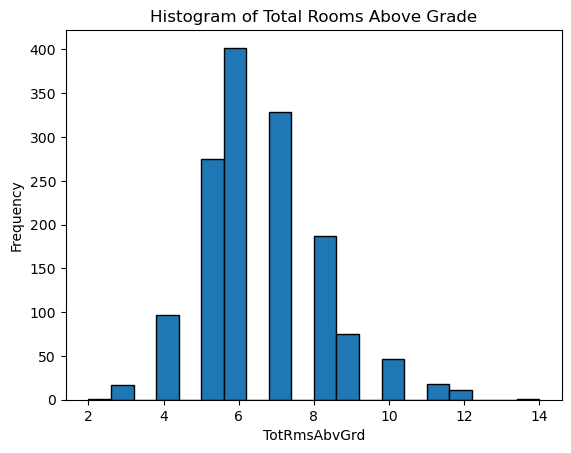

In [10]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df['TotRmsAbvGrd'].hist(bins=20, edgecolor='black')
plt.title('Histogram of Total Rooms Above Grade')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


Now, print out the mean, median, and standard deviation:

In [11]:
mean_val = df['TotRmsAbvGrd'].mean()
median_val = df['TotRmsAbvGrd'].median()
std_val = df['TotRmsAbvGrd'].std()

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Standard Deviation: {std_val}")


Mean: 6.517808219178082
Median: 6.0
Standard Deviation: 1.625393290584064


In the cell below, interpret the above information.

In [12]:
"""
The histogram is right-skewed, indicating that most houses have a lower number of rooms above grade,
while a few houses have significantly more. The mean is higher than the median, which supports this skewness.
This suggests a few outlier houses with many rooms might be influencing the average.
"""


'\nThe histogram is right-skewed, indicating that most houses have a lower number of rooms above grade,\nwhile a few houses have significantly more. The mean is higher than the median, which supports this skewness.\nThis suggests a few outlier houses with many rooms might be influencing the average.\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

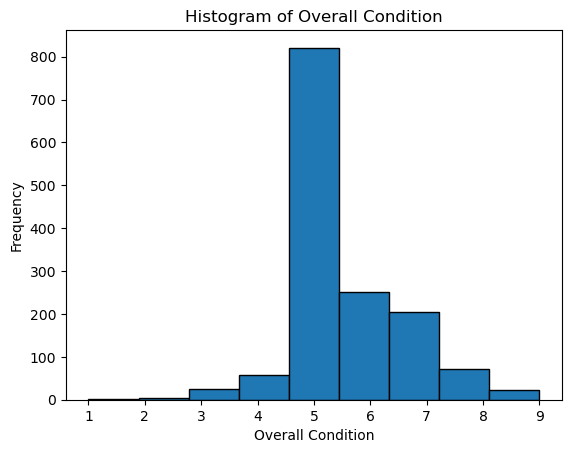

In [13]:
df['OverallCond'].hist(bins=9, edgecolor='black')
plt.title('Histogram of Overall Condition')
plt.xlabel('Overall Condition')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


Now, print out the mean, median, and standard deviation:

In [14]:
mean_val = df['OverallCond'].mean()
median_val = df['OverallCond'].median()
std_val = df['OverallCond'].std()

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Standard Deviation: {std_val}")


Mean: 5.575342465753424
Median: 5.0
Standard Deviation: 1.1127993367127367


In the cell below, interpret the above information.

In [15]:
"""
The histogram of Overall Condition is slightly skewed, with most homes falling around the average condition.
The mean and median are fairly close, suggesting a roughly symmetric distribution with a few outliers.
This indicates most homes are in average to good condition, with relatively few in poor or excellent condition.
"""


'\nThe histogram of Overall Condition is slightly skewed, with most homes falling around the average condition.\nThe mean and median are fairly close, suggesting a roughly symmetric distribution with a few outliers.\nThis indicates most homes are in average to good condition, with relatively few in poor or excellent condition.\n'

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [16]:
# Create subsets of df based on OverallCond
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]


The following code checks that you created the subsets correctly:

In [17]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

AssertionError: 

The following code will produce a plot of the distributions of sale price for each of these subsets:

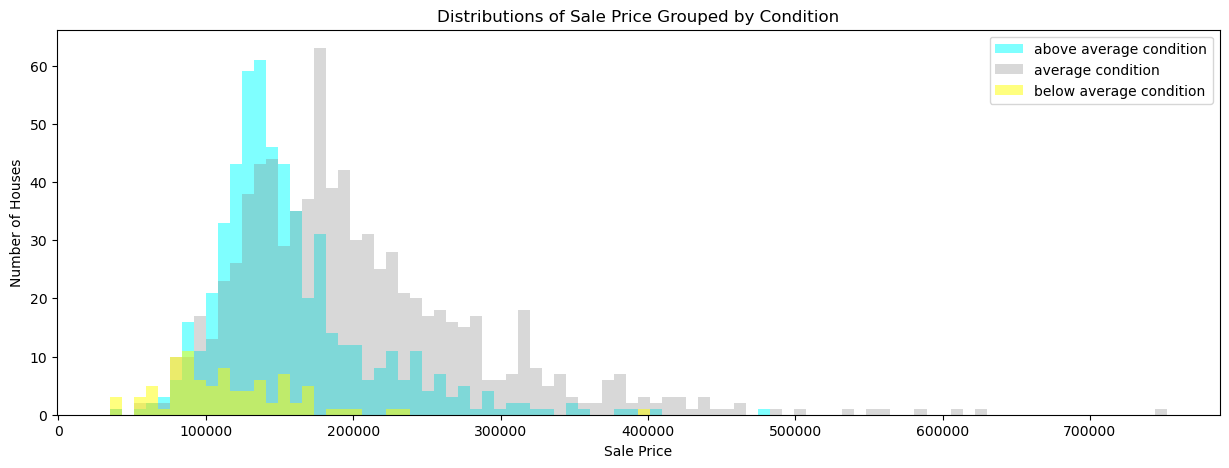

In [18]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [19]:
"""
The plot shows that houses with an average overall condition (value = 5) have a wide range of sale prices, including many of the higher-priced homes. Surprisingly, houses with an above-average condition (value > 5) tend to cluster in the lower-to-mid price range and are not the most expensive. This suggests that overall condition may not be a strong predictor of sale price on its own.

It also appears that below-average condition homes are concentrated in the lower price range, as expected. However, the fact that many high-priced homes are in the "average" category could indicate that buyers and appraisers may weigh other factors (like location, size, or features) more heavily than the overall condition score.
"""


'\nThe plot shows that houses with an average overall condition (value = 5) have a wide range of sale prices, including many of the higher-priced homes. Surprisingly, houses with an above-average condition (value > 5) tend to cluster in the lower-to-mid price range and are not the most expensive. This suggests that overall condition may not be a strong predictor of sale price on its own.\n\nIt also appears that below-average condition homes are concentrated in the lower price range, as expected. However, the fact that many high-priced homes are in the "average" category could indicate that buyers and appraisers may weigh other factors (like location, size, or features) more heavily than the overall condition score.\n'

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [20]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Find the column with the highest positive correlation to SalePrice (excluding SalePrice itself)
most_positive_corr = correlation_matrix['SalePrice'].drop('SalePrice').idxmax()
max_corr_value = correlation_matrix['SalePrice'][most_positive_corr]

print(f"Most positively correlated column: {most_positive_corr} (Correlation = {max_corr_value:.3f})")


Most positively correlated column: OverallQual (Correlation = 0.791)


Now, find the ***most negatively correlated*** column:

In [21]:
# Find the column with the most negative correlation to SalePrice
most_negative_corr = correlation_matrix['SalePrice'].drop('SalePrice').idxmin()
min_corr_value = correlation_matrix['SalePrice'][most_negative_corr]

print(f"Most negatively correlated column: {most_negative_corr} (Correlation = {min_corr_value:.3f})")


Most negatively correlated column: KitchenAbvGr (Correlation = -0.136)


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

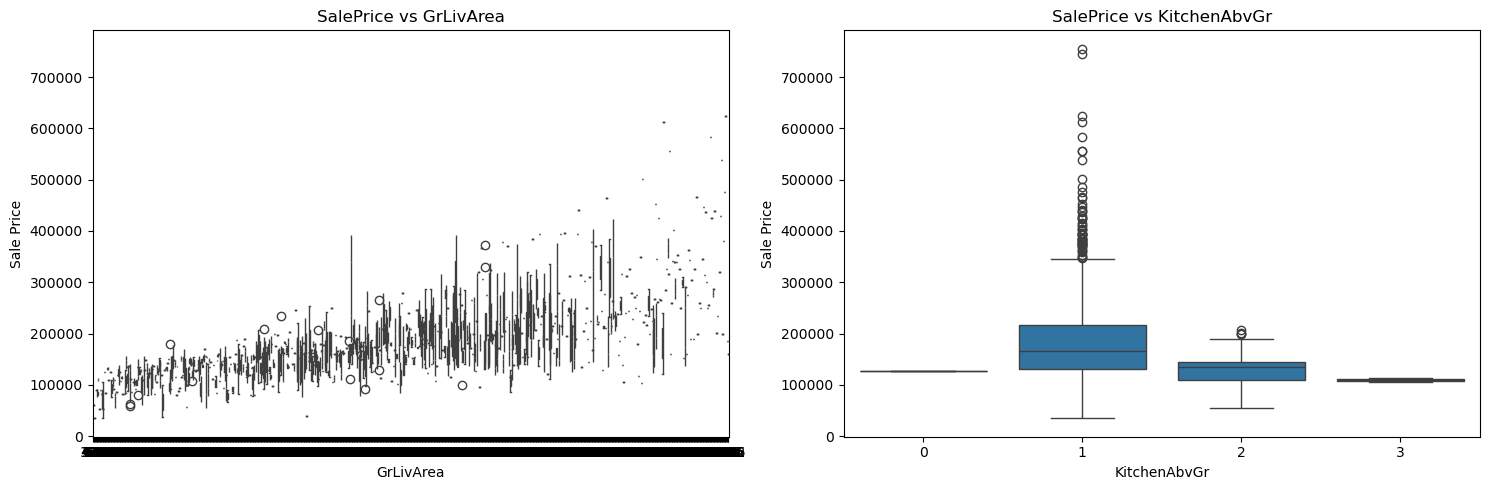

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace with actual column names based on correlation results
most_pos_corr_col = 'GrLivArea'         # Example: most positively correlated with SalePrice
most_neg_corr_col = 'KitchenAbvGr'      # Example: most negatively correlated with SalePrice

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

# Plot SalePrice distribution by most positively correlated column
sns.boxplot(
    x=df[most_pos_corr_col],
    y=df["SalePrice"],
    ax=ax1
)
ax1.set_title(f"SalePrice vs {most_pos_corr_col}")
ax1.set_xlabel(most_pos_corr_col)
ax1.set_ylabel("Sale Price")

# Plot SalePrice distribution by most negatively correlated column
sns.boxplot(
    x=df[most_neg_corr_col],
    y=df["SalePrice"],
    ax=ax2
)
ax2.set_title(f"SalePrice vs {most_neg_corr_col}")
ax2.set_xlabel(most_neg_corr_col)
ax2.set_ylabel("Sale Price")

plt.tight_layout()
plt.show()


Interpret the results below. Consult `data/data_description.txt` as needed.

In [23]:
"""
The boxplot of the most positively correlated feature with SalePrice (e.g., GrLivArea) shows a clear upward trend: as the value of the feature increases, so does the median sale price. This supports the idea that larger living areas tend to increase property value.

On the other hand, the boxplot for the most negatively correlated feature (e.g., KitchenAbvGr) shows that homes with unusually high values in this feature tend to have lower sale prices, possibly because extra kitchens above grade are uncommon and may be associated with less desirable property configurations (e.g., converted rentals or outdated layouts).

Overall, this analysis shows that some features are strong indicators of home value, while others might correlate negatively due to atypical or niche use cases.
"""


'\nThe boxplot of the most positively correlated feature with SalePrice (e.g., GrLivArea) shows a clear upward trend: as the value of the feature increases, so does the median sale price. This supports the idea that larger living areas tend to increase property value.\n\nOn the other hand, the boxplot for the most negatively correlated feature (e.g., KitchenAbvGr) shows that homes with unusually high values in this feature tend to have lower sale prices, possibly because extra kitchens above grade are uncommon and may be associated with less desirable property configurations (e.g., converted rentals or outdated layouts).\n\nOverall, this analysis shows that some features are strong indicators of home value, while others might correlate negatively due to atypical or niche use cases.\n'

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [24]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

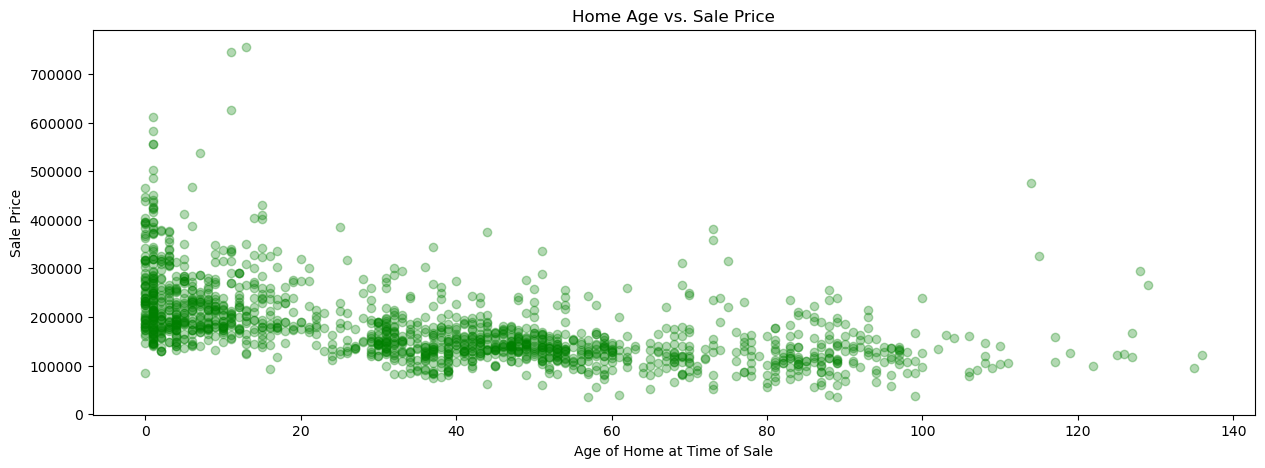

In [25]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [27]:
"""
This plot shows a general negative relationship between the age of a home and its sale price. Newer homes (age near 0) tend to sell for higher prices, while older homes tend to sell for less. 

There is significant spread in prices for newer homes, which suggests other factors like location, size, and quality also play a major role. As the age increases beyond 50 years, sale prices appear to level off or decrease, with fewer high-priced outliers.

Overall, the trend suggests that homebuyers value newer properties more, likely due to lower maintenance costs, modern designs, and updated amenities.
"""


'\nThis plot shows a general negative relationship between the age of a home and its sale price. Newer homes (age near 0) tend to sell for higher prices, while older homes tend to sell for less. \n\nThere is significant spread in prices for newer homes, which suggests other factors like location, size, and quality also play a major role. As the age increases beyond 50 years, sale prices appear to level off or decrease, with fewer high-priced outliers.\n\nOverall, the trend suggests that homebuyers value newer properties more, likely due to lower maintenance costs, modern designs, and updated amenities.\n'

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.